# Individual Assignment Banking Model
## Michael Tondu

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from __future__ import print_function
%matplotlib inline  


In [310]:
#Loading the Data 
training_data = pd.read_csv('challengeTrain.csv').drop('customerID', axis=1)
test_data = pd.read_csv('challengeTest.csv')
test_ids = test_data.customerID


### Data Exploration & Feature Engineering

In [311]:
training_data.head()

,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault,target
0,Female,Single,23.0,373.0,0,0,0,1,1,"[1000,1300)",NaN,NaN,External Agent,0,Normal,1173.46,1
1,Male,Single,27.0,702.0,1,0,0,1,0,"[1500,2000)",1.0,0.0,External Agent,0,Restructuring,0.00,0
2,Male,Single,28.0,728.0,0,0,0,1,0,"[1500,2000)",2.0,0.0,External Agent,0,Restructuring,0.00,1
3,Male,Single,45.0,650.0,0,0,0,0,0,"[1000,1300)",1.0,0.0,Call Center,0,Unpaid,0.00,1
4,Female,Unknown,NaN,625.0,0,0,0,1,0,"[650,1000)",NaN,NaN,External Agent,0,Normal,0.00,0


In [312]:
test_data.head()

,customerID,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault
0,D_00044539972,Female,Single,26.0,510.0,0,0,0,1,0,"[1300,1500)",NaN,NaN,Call Center,0,Normal,0.00
1,D_00074041049,Female,Single,20.0,739.0,0,0,0,1,0,<650,NaN,NaN,External Agent,0,Normal,0.00
2,D_00041998439,Male,Single,63.0,893.0,0,0,0,0,0,"[1300,1500)",1.0,0.0,Branch,0,Default,0.00
3,D_00041534199,Male,Single,32.0,734.0,0,0,0,0,0,"[1000,1300)",0.0,0.0,Call Center,1,Refinancing,0.00
4,D_00046605056,Male,Single,23.0,485.0,0,0,0,1,1,"[1300,1500)",1.0,0.0,External Agent,0,Restructuring,97.76


In [313]:
training_data.shape

(522939, 17)

In [314]:
test_data.shape

(174313, 17)

In [315]:
#statistical properties
training_data[training_data.columns[0:]].describe()



,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,numLoans,numMortgages,indBadLocation,sumExternalDefault,target
count,500238.000000,514626.000000,522939.000000,522939.000000,522939.000000,522939.000000,522939.000000,267338.000000,267338.000000,522939.000000,5.202600e+05,522939.000000
mean,39.095415,591.346281,0.099002,0.053599,0.042443,0.775509,0.290831,1.203432,0.048665,0.168915,4.836326e+02,0.340265
std,13.952843,261.921840,0.298665,0.225225,0.201597,0.417247,0.454146,1.243055,0.220015,0.374677,1.084238e+04,0.473799
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,28.000000,458.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,37.000000,649.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,48.000000,791.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,3.409000e+01,1.000000
max,111.000000,995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,3.000000,1.000000,6.021214e+06,1.000000


In [316]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522939 entries, 0 to 522938
Data columns (total 17 columns):
sex                   522939 non-null object
status                522939 non-null object
age                   500238 non-null float64
externalScore         514626 non-null float64
indSimin              522939 non-null int64
indXlist              522939 non-null int64
indCreditBureau       522939 non-null int64
indInternet           522939 non-null int64
indBadDebt            522939 non-null int64
salary                522939 non-null object
numLoans              267338 non-null float64
numMortgages          267338 non-null float64
channel               522939 non-null object
indBadLocation        522939 non-null int64
previous              522939 non-null object
sumExternalDefault    520260 non-null float64
target                522939 non-null int64
dtypes: float64(5), int64(7), object(5)
memory usage: 67.8+ MB


In [317]:
training_data[training_data.columns[0:]].median()


age                    37.0
externalScore         649.0
indSimin                0.0
indXlist                0.0
indCreditBureau         0.0
indInternet             1.0
indBadDebt              0.0
numLoans                1.0
numMortgages            0.0
indBadLocation          0.0
sumExternalDefault      0.0
target                  0.0
dtype: float64

In [318]:
#target distribution

total_len = len(training_data['target'])
percentage_labels = (training_data['target'].value_counts()/total_len)*100
percentage_labels

0    65.973469
1    34.026531
Name: target, dtype: float64

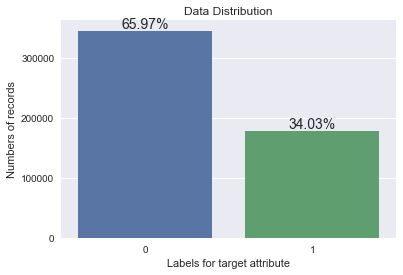

In [319]:
# Graphical representation of the target label 

sns.set()
sns.countplot(training_data.target).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for target attribute")
ax.set_ylabel("Numbers of records")
plt.show()

In [320]:
training_data.target.value_counts()

0    345001
1    177938
Name: target, dtype: int64

In [321]:
# Grouping data by age
training_data.groupby('age').mean()

,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,numLoans,numMortgages,indBadLocation,sumExternalDefault,target
age,,,,,,,,,,,
18.0,563.372134,0.013405,0.020107,0.000000,0.904826,0.018767,0.629630,0.000000,0.213137,6.099692,0.487936
19.0,537.755690,0.028021,0.053606,0.000244,0.847466,0.067008,0.832776,0.000000,0.192739,42.452802,0.459064
20.0,516.545084,0.040446,0.052632,0.001167,0.831864,0.176432,0.806009,0.002575,0.201582,65.756836,0.449313
21.0,513.351624,0.039416,0.051446,0.002815,0.824226,0.220246,0.845269,0.006242,0.177502,80.461521,0.428654
22.0,503.849549,0.043894,0.050072,0.006763,0.815321,0.266290,0.880050,0.007980,0.173885,108.566232,0.415984
23.0,497.108708,0.043079,0.047836,0.009581,0.811646,0.300129,0.950540,0.011447,0.169532,150.846388,0.407216
24.0,492.077026,0.042766,0.051235,0.018268,0.794009,0.316302,1.007832,0.011475,0.163785,206.288640,0.393085
25.0,491.948541,0.052260,0.051815,0.024795,0.782122,0.330282,1.027290,0.013045,0.160913,223.242055,0.392078
26.0,494.893750,0.053885,0.047247,0.030587,0.777756,0.333268,1.062324,0.021525,0.155473,318.920720,0.382923


In [322]:
# Grouping data by salary
training_data.groupby('salary').mean()


,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,numLoans,numMortgages,indBadLocation,sumExternalDefault,target
salary,,,,,,,,,,,,
<650,33.856011,573.757064,0.081047,0.059931,0.015250,0.740743,0.425329,0.900640,0.000337,0.312608,228.192702,0.586759
>8000,43.160221,781.678479,0.126747,0.004225,0.056549,0.853754,0.233994,2.248771,0.624058,0.082223,491.751644,0.093598
None,29.345029,541.833333,0.044905,0.073978,0.000288,0.819516,0.006333,0.000000,0.000000,0.165227,3.111665,0.453656
Unknown,NaN,NaN,0.284546,0.002862,0.000000,0.880213,0.000000,NaN,NaN,0.000000,NaN,0.224039
"[1000,1300)",38.523673,559.878319,0.087928,0.062231,0.041336,0.767451,0.287007,0.865186,0.002104,0.174068,424.284999,0.369607
"[1300,1500)",41.608091,573.335679,0.107674,0.053321,0.064327,0.781523,0.322701,1.106329,0.008398,0.118359,732.596397,0.288813
"[1500,2000)",41.660106,631.695990,0.114570,0.039296,0.054317,0.789000,0.291626,1.475264,0.024392,0.124723,663.151947,0.239559
"[2000,3000)",42.106848,679.647437,0.132163,0.030220,0.048765,0.798569,0.270255,1.645466,0.094115,0.127697,683.386474,0.195319
"[3000,5000)",42.568322,724.417526,0.148561,0.022509,0.051653,0.816076,0.255538,1.698552,0.211718,0.113197,742.242136,0.157979


In [323]:
# Grouping data by sex

male = training_data[training_data.sex=='Male'].groupby('target').size()/training_data[training_data.sex=='Male'].shape[0]
female = training_data[training_data.sex=='Female'].groupby('target').size()/training_data[training_data.sex=='Female'].shape[0]

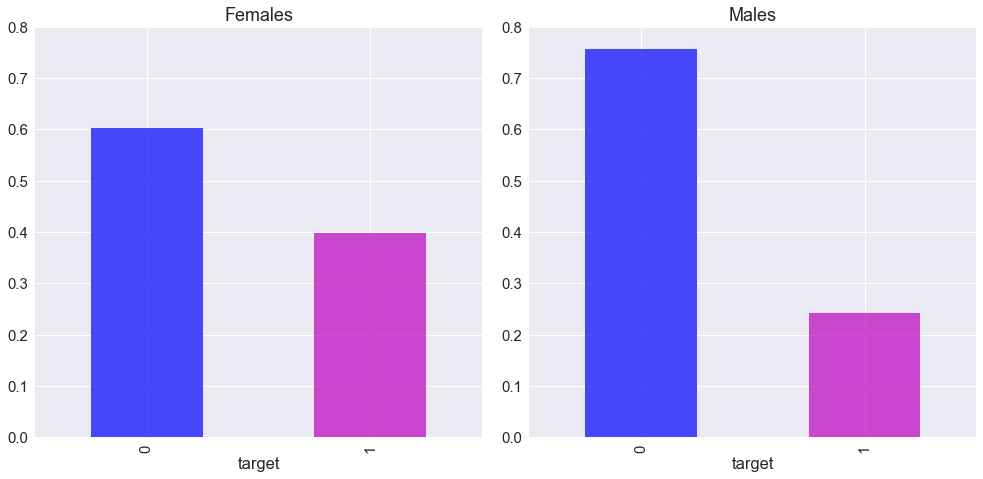

In [324]:
# Plotting target distribution by sex 
my_colors = 'bmgrkyc'
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
female.plot(kind='bar', color=(my_colors), title='Females', alpha=0.7, ylim=[0.0, 0.8])
plt.subplot(1,2,2)
male.plot(kind='bar', color=(my_colors), title='Males', alpha=0.7, ylim=[0.0, 0.8])
plt.tight_layout()

### Imputing Null Values

In [325]:
#looking for nulls
training_data.isnull().sum()

sex                        0
status                     0
age                    22701
externalScore           8313
indSimin                   0
indXlist                   0
indCreditBureau            0
indInternet                0
indBadDebt                 0
salary                     0
numLoans              255601
numMortgages          255601
channel                    0
indBadLocation             0
previous                   0
sumExternalDefault      2679
target                     0
dtype: int64

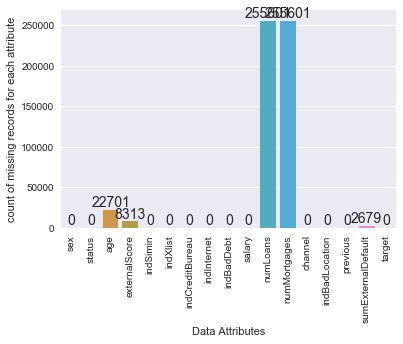

In [326]:
# Graphical representation of the missing values
x = training_data.columns
y = training_data.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [327]:
# age

training_data.age.value_counts()
print(training_data.age.isnull().sum())


22701


In [328]:
# Impute age by median value

training_data['age'] = training_data['age'].fillna(training_data['age'].median())

print(training_data.age.isnull().sum())
training_data.age.value_counts()

0


37.0     36604
25.0     15729
21.0     15628
22.0     15378
26.0     15366
32.0     15107
31.0     15023
23.0     14717
33.0     14562
29.0     14471
27.0     14419
28.0     14412
30.0     14304
24.0     14287
34.0     14207
35.0     13961
36.0     13918
38.0     13310
39.0     13188
40.0     12371
41.0     11738
42.0     11570
43.0     11019
44.0     10307
45.0     10077
46.0      9831
47.0      9469
48.0      9030
49.0      8399
50.0      7846
         ...  
80.0       735
81.0       668
82.0       534
83.0       505
84.0       441
85.0       381
86.0       264
87.0       245
88.0       170
89.0       145
90.0       111
91.0        95
92.0        73
93.0        59
95.0        33
94.0        29
96.0        19
97.0        14
98.0        10
99.0         9
106.0        3
105.0        3
107.0        2
102.0        2
103.0        2
100.0        2
104.0        2
111.0        1
110.0        1
101.0        1
Name: age, Length: 92, dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


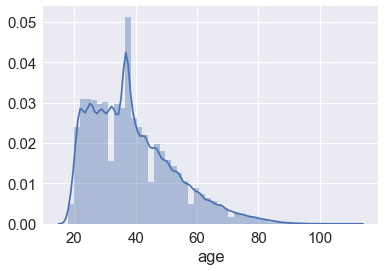

In [329]:
# Plot distribution of age to see if there are any outliers and the distribution of this variable 

sns.distplot(training_data.age)

In [330]:
# externalScore

training_data.externalScore.value_counts()
print(training_data.externalScore.isnull().sum())


8313


In [331]:
# Impute externalScore by median value

training_data['externalScore'] = training_data['externalScore'].fillna(training_data['externalScore'].median())

print(training_data.externalScore.isnull().sum())
training_data.externalScore.value_counts()


0


663.0    12471
649.0     9147
644.0     3474
574.0     2233
855.0     1962
518.0     1532
808.0     1435
525.0     1384
608.0     1257
533.0     1226
601.0     1219
623.0     1190
805.0     1170
616.0     1162
684.0     1152
625.0     1151
699.0     1101
637.0     1076
594.0     1075
548.0     1070
658.0     1064
540.0     1062
630.0     1059
845.0     1030
722.0     1026
747.0     1020
678.0     1010
651.0      996
555.0      990
653.0      987
         ...  
163.0      125
203.0      124
212.0      123
253.0      123
206.0      123
188.0      122
6.0        121
985.0      121
197.0      120
156.0      120
215.0      119
202.0      118
186.0      115
192.0      113
229.0      109
986.0       97
5.0         95
987.0       88
4.0         71
988.0       71
990.0       53
989.0       53
991.0       49
3.0         37
992.0       23
2.0         20
993.0       18
994.0        8
995.0        4
1.0          2
Name: externalScore, Length: 995, dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


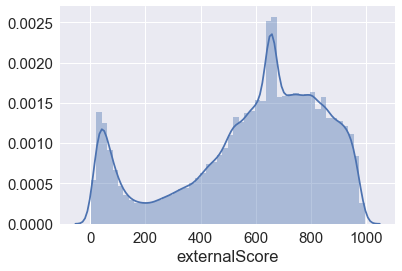

In [332]:
# Plot distribution of externalScore to see if there are any outliers and the distribution of this variable 

sns.distplot(training_data.externalScore)

In [333]:
# numLoans
training_data.numLoans.value_counts()


0.0     91649
1.0     90994
2.0     45921
3.0     23239
4.0     10313
5.0      3798
6.0      1117
7.0       245
8.0        52
9.0         9
14.0        1
Name: numLoans, dtype: int64

In [334]:
training_data.numLoans.isnull().sum()


255601

In [335]:
# Too many nulls (over 50%) so dropping numLoans
training_data = training_data.drop('numLoans', axis=1)


In [336]:
# numMortgages
training_data.numMortgages.value_counts()


0.0    254600
1.0     12476
2.0       252
3.0        10
Name: numMortgages, dtype: int64

In [337]:
training_data.numMortgages.isnull().sum()

255601

In [338]:
# Too many nulls (over 50%) so dropping numMortgages
training_data = training_data.drop('numMortgages', axis=1)

In [339]:
# sumExternalDefault
training_data.sumExternalDefault.value_counts()

0.00        368173
426.20         300
20.00          296
5.00           241
6.54           170
10.00          170
8.96           159
4.96           147
368.20         137
421.40         128
6.98           111
12.95          109
4.90           108
24.99          106
25.00          101
40.00           96
15.00           95
9.92            91
7.00            90
6.55            84
30.02           77
23.00           77
6.78            77
19.49           68
8.41            64
15.95           61
100.00          60
14.00           60
30.00           59
10.98           58
             ...  
797.21           1
315.58           1
236.18           1
582.61           1
1306.11          1
410.75           1
117.72           1
4603.17          1
2004.43          1
2003.57          1
14789.85         1
924.35           1
1137.02          1
1936.96          1
9319.51          1
335.88           1
1308.14          1
489.50           1
1383.26          1
400.74           1
2616.53          1
24281.17    

In [340]:
training_data.sumExternalDefault.isnull().sum()

2679

In [341]:
# Impute sumExternalDefault by mean value

training_data['sumExternalDefault'] = training_data['sumExternalDefault'].fillna(training_data['sumExternalDefault'].mean())
training_data.sumExternalDefault.isnull().sum()

0

In [342]:
# Value Counts for sumExternalDefault
training_data.sumExternalDefault.value_counts()

0.000000        368173
483.632581        2679
426.200000         300
20.000000          296
5.000000           241
6.540000           170
10.000000          170
8.960000           159
4.960000           147
368.200000         137
421.400000         128
6.980000           111
12.950000          109
4.900000           108
24.990000          106
25.000000          101
40.000000           96
15.000000           95
9.920000            91
7.000000            90
6.550000            84
6.780000            77
23.000000           77
30.020000           77
19.490000           68
8.410000            64
15.950000           61
100.000000          60
14.000000           60
30.000000           59
                 ...  
797.210000           1
315.580000           1
236.180000           1
582.610000           1
1306.110000          1
410.750000           1
117.720000           1
4603.170000          1
2004.430000          1
2003.570000          1
14789.850000         1
924.350000           1
1137.020000

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


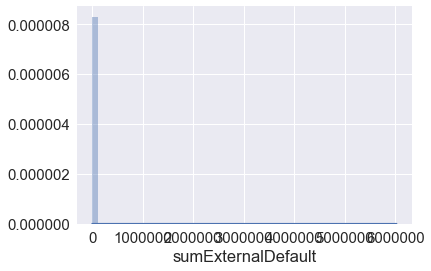

In [343]:
sns.distplot(training_data.sumExternalDefault)
# Highly concentrated in zero value

In [344]:
training_data.isnull().sum()

sex                   0
status                0
age                   0
externalScore         0
indSimin              0
indXlist              0
indCreditBureau       0
indInternet           0
indBadDebt            0
salary                0
channel               0
indBadLocation        0
previous              0
sumExternalDefault    0
target                0
dtype: int64

In [345]:
# salary
training_data.salary.value_counts()

[1000,1300)    262168
[1500,2000)     59981
[1300,1500)     56244
[650,1000)      53573
[2000,3000)     38286
<650            19606
[3000,5000)     16882
[5000,8000)      7202
None             3474
>8000            3077
Unknown          2446
Name: salary, dtype: int64

### Correlation

In [346]:
# Get the correlation of the training dataset
training_data[training_data.columns[0:]].corr()

,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,indBadLocation,sumExternalDefault,target
age,1.000000,0.327044,0.210036,0.034338,0.027433,-0.060217,-0.042914,0.010870,0.008608,-0.088161
externalScore,0.327044,1.000000,0.105529,-0.048830,-0.217487,0.018787,-0.492448,-0.040080,-0.068214,-0.221554
indSimin,0.210036,0.105529,1.000000,-0.078886,-0.005982,0.137329,-0.023332,0.011073,-0.001196,-0.081625
indXlist,0.034338,-0.048830,-0.078886,1.000000,0.024611,-0.442318,0.023786,0.018933,0.004241,0.062213
indCreditBureau,0.027433,-0.217487,-0.005982,0.024611,1.000000,-0.011831,0.169119,-0.013597,0.063064,0.046824
indInternet,-0.060217,0.018787,0.137329,-0.442318,-0.011831,1.000000,-0.002633,-0.004749,-0.003922,-0.064515
indBadDebt,-0.042914,-0.492448,-0.023332,0.023786,0.169119,-0.002633,1.000000,0.055464,0.069329,0.148744
indBadLocation,0.010870,-0.040080,0.011073,0.018933,-0.013597,-0.004749,0.055464,1.000000,0.002455,0.081940
sumExternalDefault,0.008608,-0.068214,-0.001196,0.004241,0.063064,-0.003922,0.069329,0.002455,1.000000,0.009636
target,-0.088161,-0.221554,-0.081625,0.062213,0.046824,-0.064515,0.148744,0.081940,0.009636,1.000000


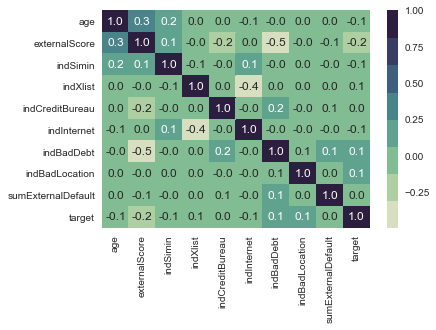

In [347]:
# Visual representation of correlation
sns.set()
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

In [348]:
# No variables seem to be highly correlated with each other, therefore no further action will be done here

### Creating Dummies


In [349]:
training_data.head()

,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,channel,indBadLocation,previous,sumExternalDefault,target
0,Female,Single,23.0,373.0,0,0,0,1,1,"[1000,1300)",External Agent,0,Normal,1173.46,1
1,Male,Single,27.0,702.0,1,0,0,1,0,"[1500,2000)",External Agent,0,Restructuring,0.00,0
2,Male,Single,28.0,728.0,0,0,0,1,0,"[1500,2000)",External Agent,0,Restructuring,0.00,1
3,Male,Single,45.0,650.0,0,0,0,0,0,"[1000,1300)",Call Center,0,Unpaid,0.00,1
4,Female,Unknown,37.0,625.0,0,0,0,1,0,"[650,1000)",External Agent,0,Normal,0.00,0


In [350]:
# creating Dummies
dummy_cols = ['sex', 'status', 'channel','previous', 'salary'
             ]
training_data_dummies = pd.get_dummies(training_data, columns = dummy_cols)


In [351]:
training_data_dummies.head()

,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,indBadLocation,sumExternalDefault,target,...,salary_>8000,salary_None,salary_Unknown,"salary_[1000,1300)","salary_[1300,1500)","salary_[1500,2000)","salary_[2000,3000)","salary_[3000,5000)","salary_[5000,8000)","salary_[650,1000)"
0,23.0,373.0,0,0,0,1,1,0,1173.46,1,...,0,0,0,1,0,0,0,0,0,0
1,27.0,702.0,1,0,0,1,0,0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
2,28.0,728.0,0,0,0,1,0,0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
3,45.0,650.0,0,0,0,0,0,0,0.00,1,...,0,0,0,1,0,0,0,0,0,0
4,37.0,625.0,0,0,0,1,0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [352]:
training_data_dummies.shape

(522939, 40)

### Train and build baseline model


In [353]:
X = training_data_dummies.drop('target', axis=1)
Y = training_data_dummies.target

In [354]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

#### KNN

In [299]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)


In [300]:
knMod.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [212]:
knMod.score(X_test, Y_test)


0.6389796152522278

In [216]:
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]


In [214]:
roc_auc_score(Y_test,test_labels , average='macro', sample_weight=None)


0.6066011910739804

#### Logistic Regression

In [240]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [241]:
glmMod.fit(X_train, Y_train)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=2, warm_start=False)

In [242]:
glmMod.score(X_test, Y_test)

0.6938539794240257

In [243]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]


In [244]:
roc_auc_score(Y_test,test_labels , average='macro', sample_weight=None)


0.7050317007927087

#### Ada Boost

In [245]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)


In [246]:
adaMod.fit(X_train, Y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)

In [247]:
adaMod.score(X_test, Y_test)


0.6942899759054576

In [248]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]


In [249]:
roc_auc_score(Y_test,test_labels , average='macro', sample_weight=None)


0.7060576193744126

#### Gradient Boosting

In [56]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [57]:
gbMod.fit(X_train, Y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [58]:
gbMod.score(X_test, Y_test)


0.6997437564538953

In [59]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]


In [60]:
roc_auc_score(Y_test,test_labels , average='macro', sample_weight=None)


0.7117096953235547

#### Random Forest

In [264]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [265]:
rfMod.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [266]:
rfMod.score(X_test, Y_test)


0.6519906681454851

In [267]:
test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]


In [268]:
roc_auc_score(Y_test,test_labels , average='macro', sample_weight=None)


0.6381926263654113

### Cross Validation

In [355]:
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, Y_train=Y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, Y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [ ]:
cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc')
cvD

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 33.2min finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.5s finished


### Hyper parameter optimization using Randomized search


Two highest scores came with Ada Boost and Gradient Boost, now we optimize the parameters for these models in order to pick the highest one 

#### ADA Boost Hyperparameter optimization

In [250]:
adaHyperParams = {'n_estimators': [10,50,100,200,420]}

In [251]:
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   3.0s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   2.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   2.8s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  13.8s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  12.8s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  13.2s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  26.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  28.0s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 10.8min finished


In [252]:
gridSearchAda.best_params_, gridSearchAda.best_score_

##### 'n_estimators': 420}, 0.7055228847405199 #####

({'n_estimators': 200}, 0.7050824803996882)

#### Gradient Boost Hyperparameter optimization

In [70]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

# originally n_estimators: 10,500
# originally max_depth: 1:10 

In [71]:
gridSearchGB  = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] loss=deviance, max_depth=8, n_estimators=58 .....................
[CV] ...... loss=deviance, max_depth=8, n_estimators=58, total= 3.9min
[CV] loss=deviance, max_depth=8, n_estimators=58 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min remaining:    0.0s


[CV] ...... loss=deviance, max_depth=8, n_estimators=58, total= 3.8min
[CV] loss=deviance, max_depth=8, n_estimators=58 .....................
[CV] ...... loss=deviance, max_depth=8, n_estimators=58, total= 3.5min
[CV] loss=deviance, max_depth=8, n_estimators=59 .....................
[CV] ...... loss=deviance, max_depth=8, n_estimators=59, total= 3.7min
[CV] loss=deviance, max_depth=8, n_estimators=59 .....................
[CV] ...... loss=deviance, max_depth=8, n_estimators=59, total= 3.7min
[CV] loss=deviance, max_depth=8, n_estimators=59 .....................
[CV] ...... loss=deviance, max_depth=8, n_estimators=59, total= 3.5min
[CV] loss=deviance, max_depth=7, n_estimators=57 .....................
[CV] ...... loss=deviance, max_depth=7, n_estimators=57, total= 2.5min
[CV] loss=deviance, max_depth=7, n_estimators=57 .....................
[CV] ...... loss=deviance, max_depth=7, n_estimators=57, total= 2.7min
[CV] loss=deviance, max_depth=7, n_estimators=57 .....................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 191.8min finished


In [73]:
gridSearchGB.best_params_, gridSearchGB.best_score_

#### {'loss': 'exponential', 'max_depth': 8, 'n_estimators': 59}, 0.7135200871575476 ####

({'loss': 'deviance', 'max_depth': 8, 'n_estimators': 59}, 0.7124575895619493)

### Training with optimized parameters 


In [255]:
# Ada Boost after Grid Search
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, Y_train)

In [256]:
# Gradient Boost after Grid Search
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, Y_train)


In [ ]:
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')


In [ ]:
cvDictbestpara


In [262]:
# Ada Boost roc_auc_score
test_labels=bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]

In [263]:
roc_auc_score(Y_test,test_labels , average='macro', sample_weight=None)

0.7060576193744126

In [124]:
# Gradient Boost roc_auc_score
test_labels=bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]


In [125]:
roc_auc_score(Y_test,test_labels , average='macro', sample_weight=None)


0.7144568091019516

### Working on test set

Clean test set and make dummies to be able to run the model 


In [126]:
test_data_dummies = test_data.drop('customerID', axis=1)


In [127]:
test_data_dummies['age'] = test_data_dummies['age'].fillna(test_data_dummies['age'].median())


In [128]:
test_data_dummies['externalScore'] = test_data_dummies['externalScore'].fillna(test_data_dummies['externalScore'].median())


In [129]:
test_data_dummies = test_data_dummies.drop('numLoans', axis=1)


In [130]:
test_data_dummies = test_data_dummies.drop('numMortgages', axis=1)


In [131]:
test_data_dummies['sumExternalDefault'] = test_data_dummies['sumExternalDefault'].fillna(test_data_dummies['sumExternalDefault'].mean())


In [132]:
dummy_cols = ['sex', 'status', 'channel','previous', 'salary'
             ]
test_data_dummies = pd.get_dummies(test_data_dummies, columns = dummy_cols)

In [143]:
test_data_dummies.describe()


,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,indBadLocation,sumExternalDefault,sex_Female,...,salary_>8000,salary_None,salary_Unknown,"salary_[1000,1300)","salary_[1300,1500)","salary_[1500,2000)","salary_[2000,3000)","salary_[3000,5000)","salary_[5000,8000)","salary_[650,1000)"
count,174313.000000,174313.000000,174313.000000,174313.000000,174313.000000,174313.000000,174313.000000,174313.000000,174313.000000,174313.000000,...,174313.000000,174313.000000,174313.000000,174313.000000,174313.000000,174313.000000,174313.000000,174313.000000,174313.000000,174313.000000
mean,38.978493,592.274954,0.098111,0.053719,0.042160,0.773614,0.290546,0.171444,465.633592,0.628043,...,0.005852,0.006844,0.004538,0.502349,0.107714,0.113118,0.072840,0.032447,0.013722,0.102689
std,13.620117,259.541010,0.297465,0.225464,0.200954,0.418493,0.454016,0.376898,4966.963367,0.483328,...,0.076271,0.082445,0.067210,0.499996,0.310020,0.316738,0.259875,0.177186,0.116337,0.303553
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,463.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,648.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,788.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,38.160000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,108.000000,995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,999586.200000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Using model on test set

In [188]:
# Here, we choose the best model --> GRADIENT BOOST
model = gridSearchGB.best_estimator_

In [189]:
predictions = model.predict_proba(test_data_dummies)
predictions


array([[0.77834455, 0.22165545],
       [0.41051503, 0.58948497],
       [0.87341872, 0.12658128],
       ...,
       [0.88089986, 0.11910014],
       [0.5325584 , 0.4674416 ],
       [0.75143017, 0.24856983]])

In [190]:
predictions = pd.DataFrame(predictions, columns=['Prediction 0', 'prediction'])


In [191]:
# We get the probability that someone doesn't default (0) and the probability that someone does (1) 
predictions

,Prediction 0,prediction
0,0.778345,0.221655
1,0.410515,0.589485
2,0.873419,0.126581
3,0.693026,0.306974
4,0.597888,0.402112
5,0.701546,0.298454
6,0.799069,0.200931
7,0.584501,0.415499
8,0.665306,0.334694
9,0.814180,0.185820


In [192]:
# We drop the probability of 0 and keep the probability of 1 (aka. someone defaulting, which is what we're looking for)
predictions = predictions.drop('Prediction 0', axis=1)

In [193]:
# We concatenate the original test dataset with the prediction of someone defaulting 
submission = pd.concat([test_data, predictions], axis=1)

In [194]:
submission.head(20)

,customerID,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault,prediction
0,D_00044539972,Female,Single,26.0,510.0,0,0,0,1,0,"[1300,1500)",NaN,NaN,Call Center,0,Normal,0.00,0.221655
1,D_00074041049,Female,Single,20.0,739.0,0,0,0,1,0,<650,NaN,NaN,External Agent,0,Normal,0.00,0.589485
2,D_00041998439,Male,Single,63.0,893.0,0,0,0,0,0,"[1300,1500)",1.0,0.0,Branch,0,Default,0.00,0.126581
3,D_00041534199,Male,Single,32.0,734.0,0,0,0,0,0,"[1000,1300)",0.0,0.0,Call Center,1,Refinancing,0.00,0.306974
4,D_00046605056,Male,Single,23.0,485.0,0,0,0,1,1,"[1300,1500)",1.0,0.0,External Agent,0,Restructuring,97.76,0.402112
5,D_00008122018,Female,Single,54.0,687.0,0,0,0,0,1,"[1300,1500)",NaN,NaN,Branch,0,Unpaid,36.65,0.298454
6,D_00043147232,Male,Single,28.0,681.0,0,0,0,1,0,"[1000,1300)",2.0,0.0,App,0,Normal,0.00,0.200931
7,D_00027250394,Female,Single,59.0,932.0,0,0,0,1,0,"[1000,1300)",NaN,NaN,External Agent,0,Restructuring,0.00,0.415499
8,D_00987656775,Male,Widower,NaN,NaN,0,0,0,1,0,Unknown,NaN,NaN,External Agent,0,Normal,NaN,0.334694
9,D_00029645583,Male,Single,38.0,799.0,0,0,0,1,0,"[1500,2000)",3.0,0.0,Recovery,0,Restructuring,0.00,0.185820


In [195]:
submission.shape

(174313, 18)

In [196]:
submission.to_csv('submission.csv', index = False)